# Bike Sharing Demand Analysis using Linear Regression

## 1 Problem Statement

A US bike-sharing provider, BoomBikes, is looking to understand demand for shared bikes after the COVID-19 lockdown in order to stand out from competitors and make huge profits. The goal of the analytics project is to 
- model demand with the available independent variables,
- identify the variables that are significant in predicting demand, and
- determine how well the variables describe bike demand.

BoomBikes intends to modify their business strategy to meet demand levels and achieve outstanding performance.

## 2 Approach to Analysis

Analysis is done in the following steps:
- Data Understanding & Cleaning
- Data Visualisation
- Data Preparation
- Model Training
- Model Evaluation
- Model Interpretation

## 3 Data Understanding & Cleaning

### 3.1 Data Loading & Inspection

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the data
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Inspecting shape of the data
df.shape

(730, 16)

In [4]:
# Checking data types and other meta-data
df.info(verbose='True')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### 3.2 Data Cleaning

#### 3.2.1 Checking and fixing header and footer rows

In [5]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,2,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


No changes to top and bottom rows are required since they have no anomalies.

#### 3.2.2 Checking and fixing missing values

In [7]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Since no columns have missing values, fixing is not required.

#### 3.2.3 Checking and fixing duplicate rows

In [8]:
df[df.duplicated()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


No changes are required because there are no duplicate rows.

#### 3.2.4 Validating and standardising data

In [9]:
# Printing descriptive statistics of numerical variables to identify anomalies
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Descriptive statistics do not show any anomalies.

In [10]:
# Printing unique values of select variables to identify anomalies
for x in ['season','yr','mnth','holiday','weekday','workingday','weathersit']:
    print(df[x].value_counts(),end='\n\n')

3    188
2    184
1    180
4    178
Name: season, dtype: int64

0    365
1    365
Name: yr, dtype: int64

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

0    709
1     21
Name: holiday, dtype: int64

1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: weekday, dtype: int64

1    504
0    226
Name: workingday, dtype: int64

1    463
2    246
3     21
Name: weathersit, dtype: int64



In [11]:
# Printing all columns after sorting
for x in df.columns:
    print(df[x].sort_values(),end='\n\n')

0        1
1        2
2        3
3        4
4        5
      ... 
725    726
726    727
727    728
728    729
729    730
Name: instant, Length: 730, dtype: int64

0      01-01-2018
365    01-01-2019
31     01-02-2018
396    01-02-2019
59     01-03-2018
          ...    
607    31-08-2019
303    31-10-2018
668    31-10-2019
364    31-12-2018
729    31-12-2019
Name: dteday, Length: 730, dtype: object

0      1
381    1
382    1
383    1
384    1
      ..
326    4
327    4
328    4
308    4
338    4
Name: season, Length: 730, dtype: int64

0      0
248    0
247    0
246    0
245    0
      ..
482    1
481    1
480    1
478    1
729    1
Name: yr, Length: 730, dtype: int64

0       1
366     1
367     1
368     1
369     1
       ..
360    12
361    12
362    12
728    12
729    12
Name: mnth, Length: 730, dtype: int64

0      0
478    0
479    0
480    0
481    0
      ..
415    1
680    1
314    1
16     1
359    1
Name: holiday, Length: 730, dtype: int64

90     0
118    0
377    0
384 

No changes are required since no defects are observed.

#### 3.2.5 Checking data types

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## 4 Data Visualisation

In [13]:
# Dropping extraneous variables
df1 = df.drop(labels=['instant','dteday','casual','registered'],axis=1)
df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


The rationale for dropping variables is as follows:
1. instant - index variable which is not a predictor of cnt
2. dteday - date variable which is not required because of other variables like yr, mnth, weekday, etc.
3. casual and registered - variables which add up to cnt and do not provide useful information in a regression model

In [14]:
# Segregating numerical and categorical variables by inspection
cat_vars = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
num_vars = ['cnt','temp','atemp','hum','windspeed']

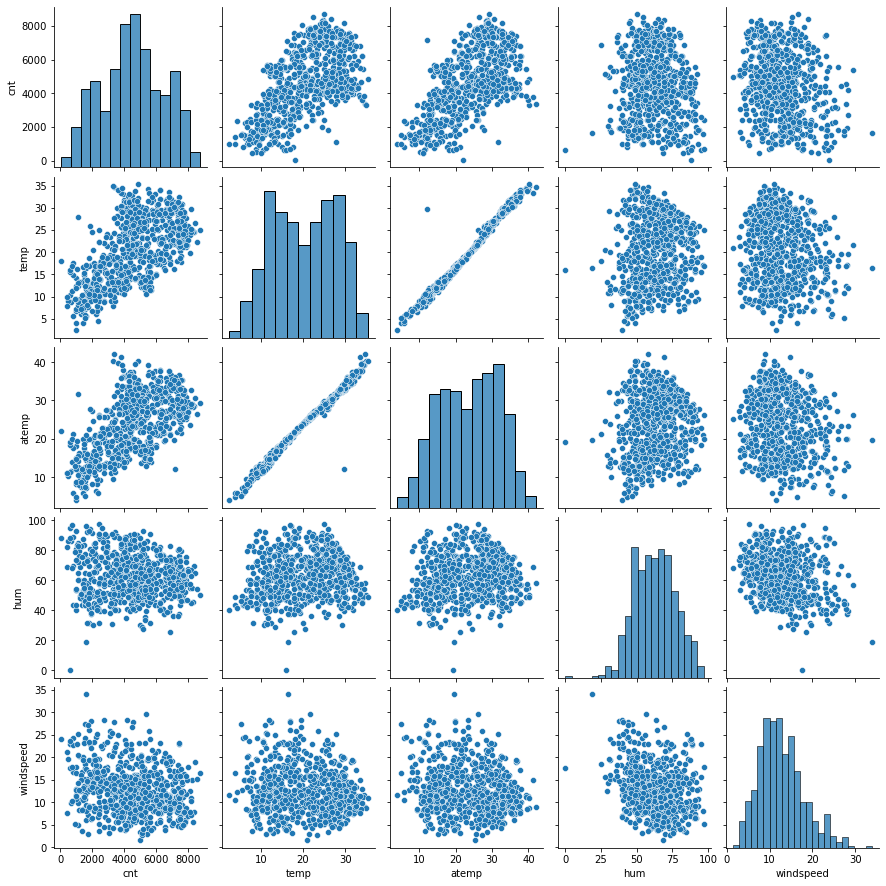

In [15]:
# Creating scatter plots of the response variable versus numerical variables
sns.pairplot(df1[num_vars])
plt.show()

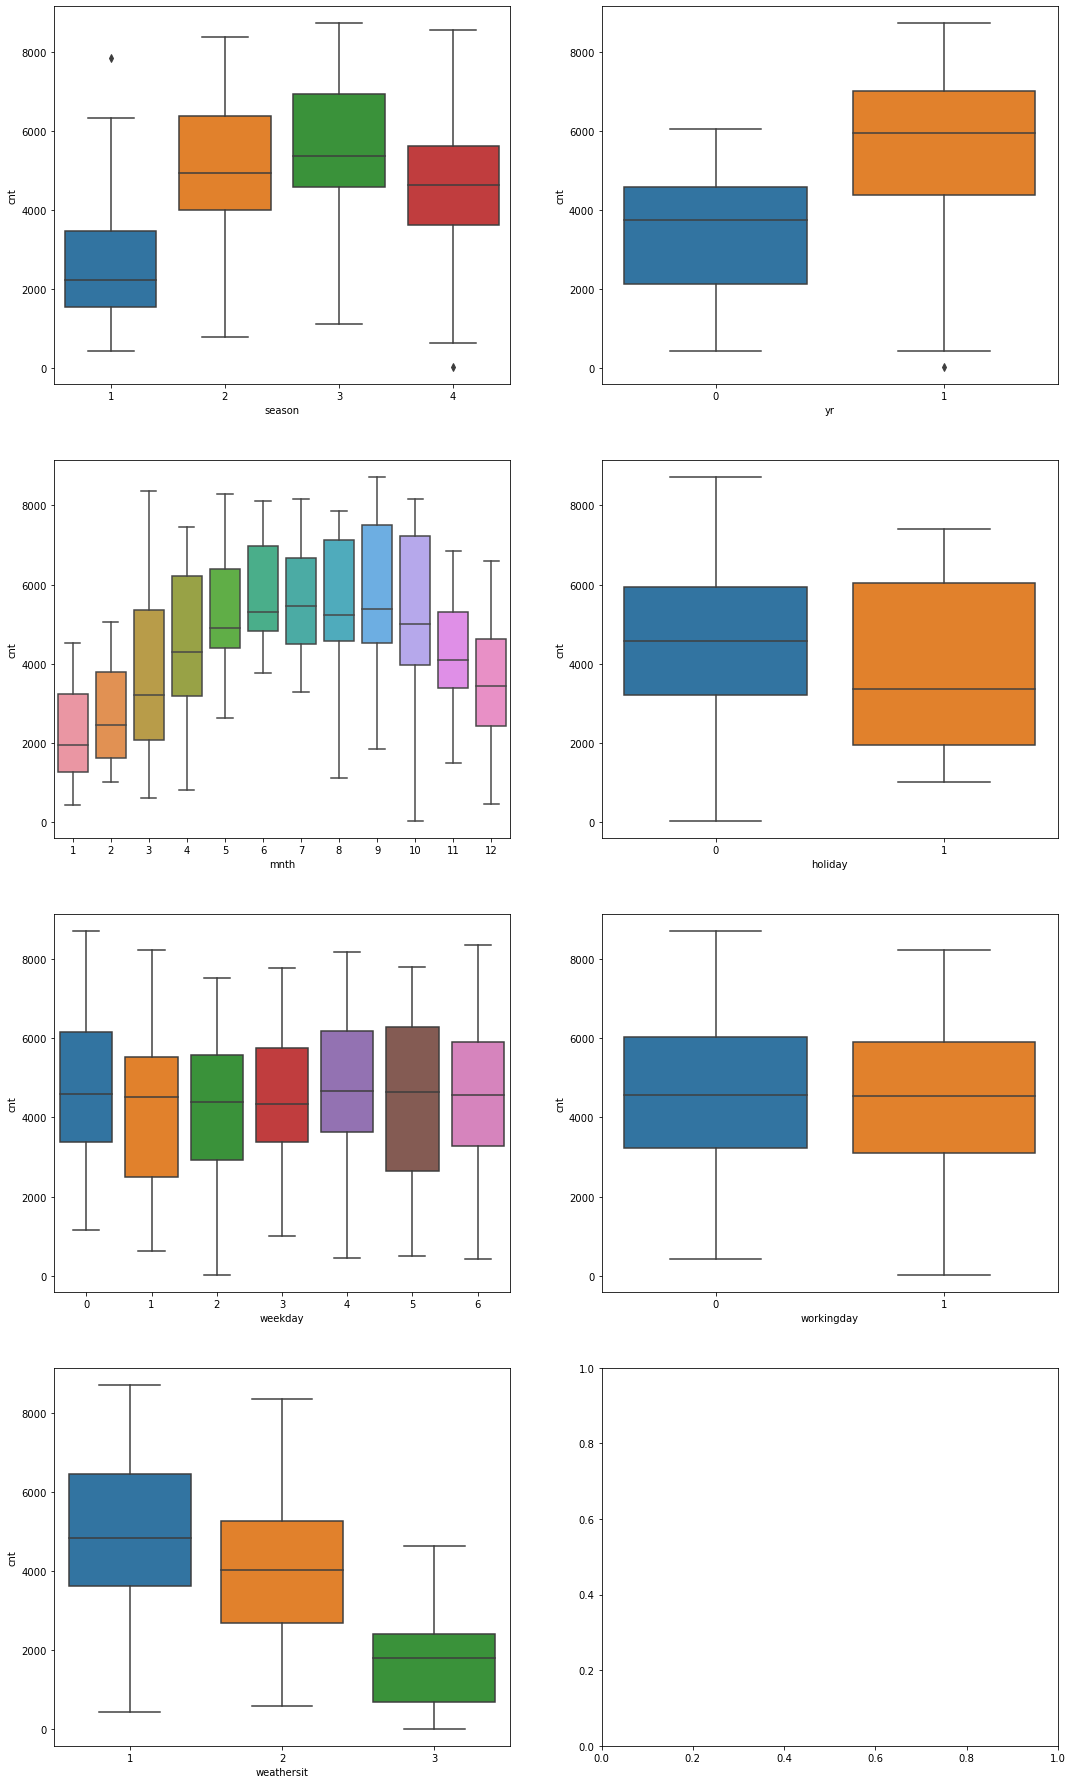

In [16]:
# Creating box plots of the response variable versus categorical variables
fig,axs = plt.subplots(4,2,figsize=[18,32])
i = 0
for x in cat_vars:
    sns.boxplot(df1[x],df1['cnt'],ax=axs[i//2][i%2])
    i = i+1
fig.show()

The scatter plots indicate a clear linear trend between 'temp' and 'cnt' and 'atemp' and 'cnt' and the boxplots do not have significant outliers. Thus, a linear regression model is applicable on the dataset.

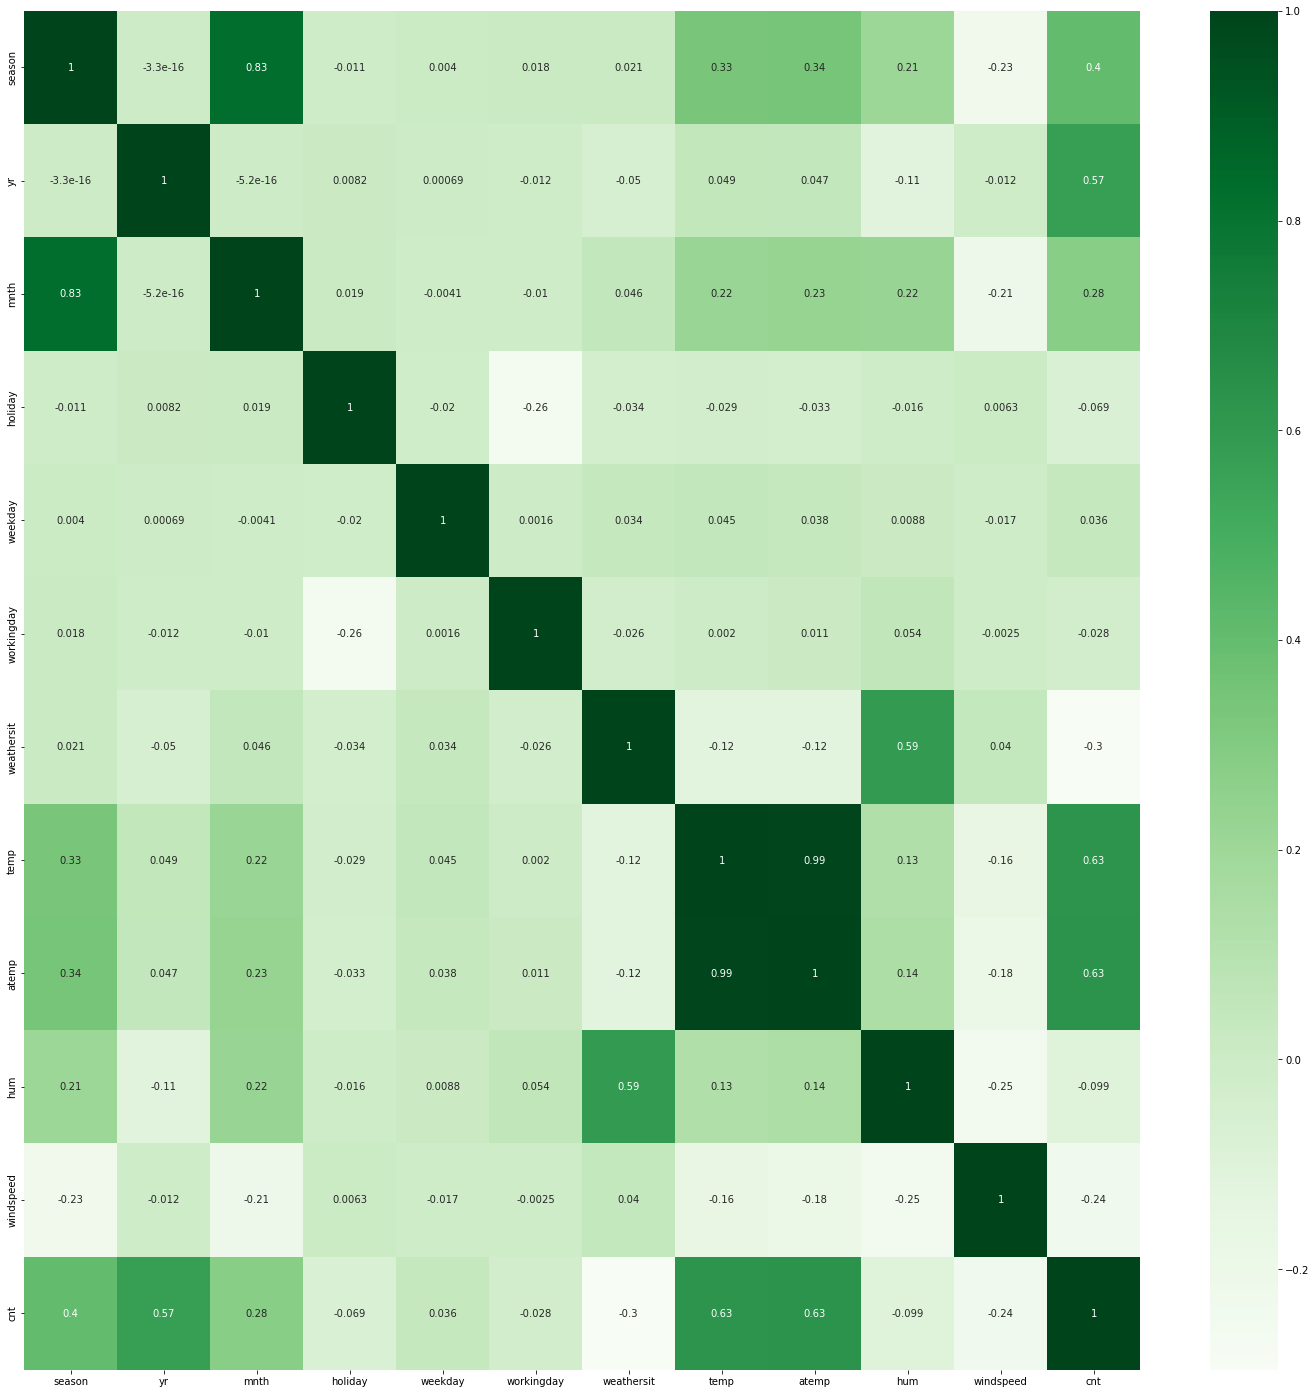

In [17]:
# Creating a correlation matrix of the dataset
fig,ax = plt.subplots(figsize=[25,25])
sns.heatmap(df1.corr(),cmap='Greens',annot=True,ax=ax)
fig.show()

## 5 Data Preparation

### 5.1 Encoding categorical variables

Binary categorical variables are already encoded in terms of 1s and 0s.

In [18]:
# Encoding other categorical variables using dummy variables
for x in ['season','mnth','weekday','weathersit']:
    df1[x] = df1[x].astype('category')
df1 = pd.get_dummies(df1,drop_first=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

### 5.2 Splitting the dataset into training and testing datasets

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
df1_train,df1_test = train_test_split(df1,train_size=0.7,random_state=100)
print(df1_train.shape)
print(df1_test.shape)

(510, 30)
(220, 30)


### 5.3 Scaling numerical variables using MinMax scaling

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
# Scaling the numerical variables in the training dataset
scaler = MinMaxScaler()
df1_train[num_vars] = scaler.fit_transform(df1_train[num_vars])
df1_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.247059,0.262745,...,0.086275,0.084314,0.154902,0.152941,0.135294,0.143137,0.147059,0.129412,0.345098,0.029412
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.431725,0.440557,...,0.281045,0.278131,0.362166,0.360284,0.342373,0.350557,0.354512,0.335985,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
# Scaling the numerical variables in the test dataset
df1_test[num_vars] = scaler.transform(df1_test[num_vars])
df1_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.522154,0.263636,0.245455,...,0.072727,0.086364,0.118182,0.122727,0.159091,0.140909,0.131818,0.172727,0.318182,0.027273
std,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.219163,0.441609,0.431338,...,0.260281,0.281541,0.323559,0.328872,0.366595,0.348721,0.339064,0.378873,0.466833,0.163248
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 6 Training the Model

The model will be trained using recursive feature elimination followed by backward elimination.

In [24]:
# Importing libraries for training the model
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [25]:
# Preparing response and predictor variables for training
y_train = df1_train.pop('cnt')
X_train = df1_train
X_train_sm = sm.add_constant(X_train)

In [26]:
# Defining a function to train a linear regression model and display statistics
def lr_model(col,X_train_sm,y_train):
    if col != None:
        X_train_sm.drop(columns=col,inplace=True)
    
    lr = sm.OLS(y_train,X_train_sm).fit()

    vif = [variance_inflation_factor(X_train_sm,i) for i in range(1,len(X_train_sm.columns))]
    VIF = pd.DataFrame({'Variable':X_train_sm.columns[1:],'VIF':vif})
    
    print(lr.summary(),end='\n\n')
    print(VIF)
    
    return lr

### 6.1 Preliminary model with all predictor variables

In [27]:
lr = lr_model(None,X_train_sm,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     93.97
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          1.24e-177
Time:                        15:59:14   Log-Likelihood:                 523.07
No. Observations:                 510   AIC:                            -986.1
Df Residuals:                     480   BIC:                            -859.1
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2367      0.030      7.821   

In [28]:
# Checking the number of variables with p-values greater than 0.05
len(lr.pvalues[lr.pvalues>0.05])

15

We will use recursive feature elimination to eliminate 10 predictor variables.

### 6.2 Recursive Feature Elimination

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [30]:
# Training the model on the dataset
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [31]:
# Performing RFE with 20 output variables
rfe = RFE(lm,n_features_to_select=20)
rfe = rfe.fit(X_train,y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 6),
 ('mnth_3', True, 1),
 ('mnth_4', True, 1),
 ('mnth_5', True, 1),
 ('mnth_6', True, 1),
 ('mnth_7', False, 7),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 8),
 ('mnth_12', False, 9),
 ('weekday_1', False, 4),
 ('weekday_2', False, 5),
 ('weekday_3', False, 3),
 ('weekday_4', True, 1),
 ('weekday_5', False, 2),
 ('weekday_6', False, 10),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [32]:
# Choosing variables selected by RFE
X_train = X_train[X_train.columns[rfe.support_]]
X_train.shape

(510, 20)

In [33]:
X_train_sm = sm.add_constant(X_train)

### 6.3 Model 1 with top 20 predictors

In [34]:
lr = lr_model(None,X_train_sm,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     136.6
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          1.53e-185
Time:                        15:59:16   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -997.3
Df Residuals:                     489   BIC:                            -908.4
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2445      0.028      8.771   

### 6.4 Model 2 after removing 'atemp', which has the largest p-value

In [35]:
lr = lr_model('atemp',X_train_sm,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     144.1
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          1.36e-186
Time:                        15:59:17   Log-Likelihood:                 519.56
No. Observations:                 510   AIC:                            -999.1
Df Residuals:                     490   BIC:                            -914.4
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2448      0.028      8.793   

### 6.5 Model 3 after removing 'mnth_4', which has the largest p-value

In [36]:
lr = lr_model('mnth_4',X_train_sm,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     151.4
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          3.93e-187
Time:                        15:59:17   Log-Likelihood:                 518.22
No. Observations:                 510   AIC:                            -998.4
Df Residuals:                     491   BIC:                            -918.0
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2482      0.028      8.927   

### 6.6 Model 4 after removing 'mnth_6', which has the largest p-value

In [37]:
lr = lr_model('mnth_6',X_train_sm,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     160.0
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          6.97e-188
Time:                        15:59:17   Log-Likelihood:                 517.36
No. Observations:                 510   AIC:                            -998.7
Df Residuals:                     492   BIC:                            -922.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2475      0.028      8.897   

### 6.7 Model 5 after removing 'mnth_5', which has the largest p-value

In [38]:
lr = lr_model('mnth_5',X_train_sm,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     169.4
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          1.65e-188
Time:                        15:59:18   Log-Likelihood:                 516.17
No. Observations:                 510   AIC:                            -998.3
Df Residuals:                     493   BIC:                            -926.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2426      0.028      8.769   

### 6.8 Model 6 after removing 'season_3', which has the largest p-value

In [39]:
lr = lr_model('season_3',X_train_sm,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.0
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          4.38e-189
Time:                        15:59:18   Log-Likelihood:                 514.83
No. Observations:                 510   AIC:                            -997.7
Df Residuals:                     494   BIC:                            -929.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2429      0.028      8.764   

### 6.9 Model 7 after removing 'mnth_3', which has the largest p-value

In [40]:
lr = lr_model('mnth_3',X_train_sm,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     192.1
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          1.05e-189
Time:                        15:59:18   Log-Likelihood:                 513.56
No. Observations:                 510   AIC:                            -997.1
Df Residuals:                     495   BIC:                            -933.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2491      0.027      9.073   

### 6.10 Model 8 after removing 'weekday_4', which has the largest p-value

In [41]:
lr = lr_model('weekday_4',X_train_sm,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     205.9
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          3.02e-190
Time:                        15:59:18   Log-Likelihood:                 512.08
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     496   BIC:                            -936.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2500      0.028      9.089   

Model 8 is final because p-values of all predictor variables are less than 0.05 and VIFs are less than 5.

## 7 Model Evaluation

### 7.1 Residual Analysis

In [42]:
# Calculating residuals
y_train_pred = lr.predict(X_train_sm)
res = y_train - y_train_pred
res

576    0.112257
426   -0.032356
728   -0.175142
482   -0.132726
111   -0.089889
         ...   
578    0.010542
53    -0.023351
350    0.050918
79    -0.058934
520    0.151547
Length: 510, dtype: float64

#### 7.1.1 Normality

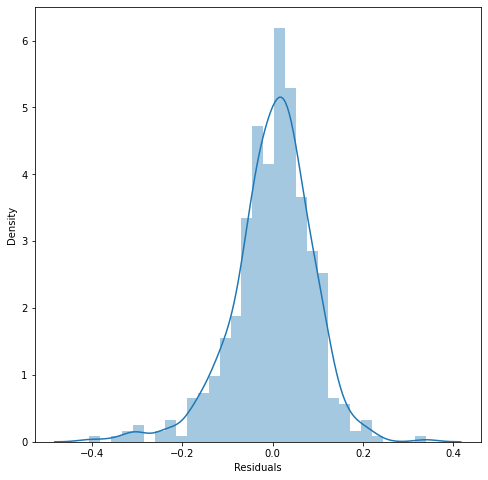

In [43]:
# Plotting a histogram of the residuals
fig,ax = plt.subplots(figsize=[8,8])
sns.distplot(res,ax=ax)
ax.set_xlabel('Residuals')
fig.show()

As seen from the histogram, the residuals are approximately normally distributed with mean at 0.

#### 7.1.2 Homoscedasticity

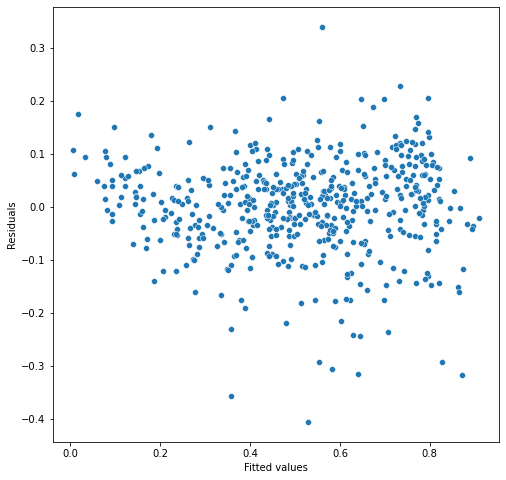

In [44]:
# Plotting a scatter plot of residuals versus predicted values
fig,ax = plt.subplots(figsize=[8,8])
sns.scatterplot(y_train_pred,res,ax=ax)
ax.set_ylabel('Residuals')
ax.set_xlabel('Fitted values')
fig.show()

As seen from the scatter plot, the variability of residuals is quite low.

#### 7.1.3 Independence

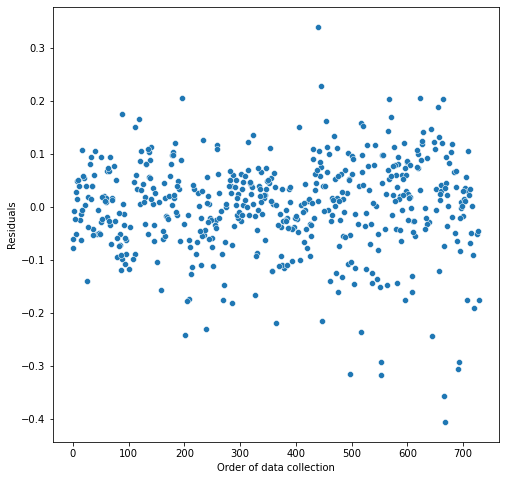

In [45]:
# Plotting a scatter plot of residuals against order of data collection
fig,ax = plt.subplots(figsize=[8,8])
sns.scatterplot(X_train_sm.index,res,ax=ax)
ax.set_ylabel('Residuals')
ax.set_xlabel('Order of data collection')
fig.show()

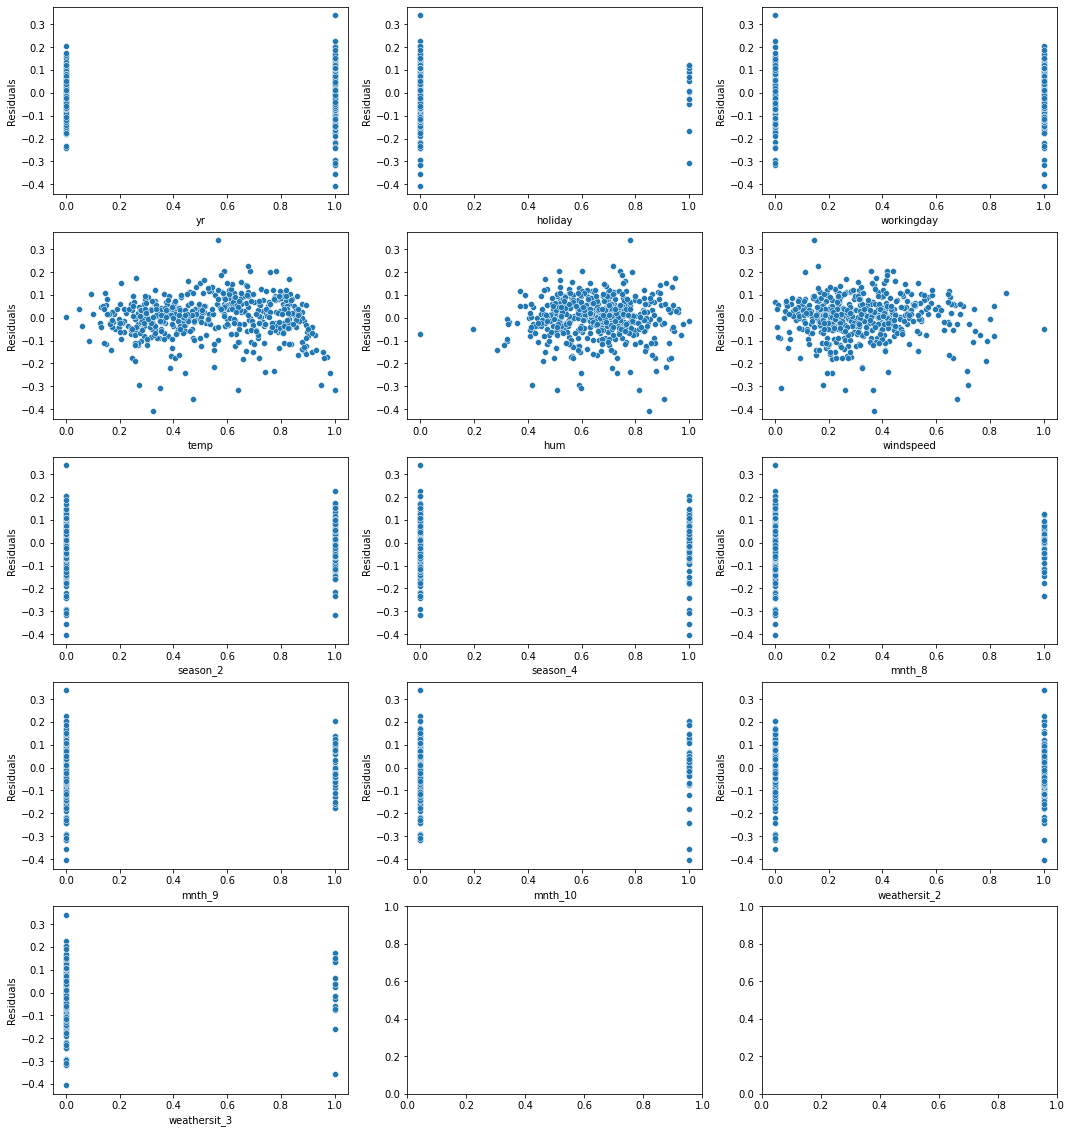

In [46]:
# Plotting scatter plots of residuals against predictor variables
fig,axs = plt.subplots(5,3,figsize=[18,20])
i = 0
for x in list(X_train_sm.columns[1:]):
    sns.scatterplot(X_train_sm[x],res,ax=axs[i//3][i%3])
    axs[i//3][i%3].set_xlabel(x)
    axs[i//3][i%3].set_ylabel('Residuals')
    i = i+1
fig.show()

The above charts indicate independence of residuals due to relatively minor patterns in the plots of residuals versus order of data collection and residuals versus predictor variables.

### 7.2 Plot of Actual and Fitted Values against Order of Data Collection (Training Set)

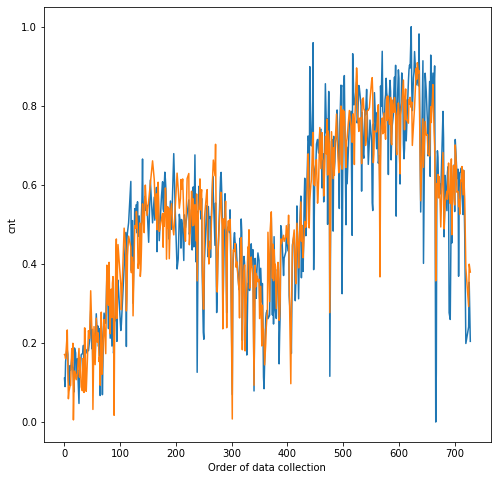

In [47]:
fig,ax = plt.subplots(figsize=[8,8])
sns.lineplot(X_train_sm.index,y_train,ax=ax)
sns.lineplot(X_train_sm.index,y_train_pred,ax=ax)
ax.set_xlabel('Order of data collection')
fig.show()

Thus, the model is a good predictor of the response variable on the training dataset.

### 7.3 Model evaluation on the test set

The model is evaluated on the test set by calculating R-square on it.

In [48]:
from sklearn.metrics import r2_score

In [49]:
# df1_test was already normalised during the data preparation step

# Deriving y_test, and y_test_pred
y_test = df1_test.pop('cnt')
X_test = df1_test

In [50]:
X_test_sm = sm.add_constant(X_test)[X_train_sm.columns]
X_test_sm.head()

,const,yr,holiday,workingday,temp,hum,windspeed,season_2,season_4,mnth_8,mnth_9,mnth_10,weathersit_2,weathersit_3
184,1.0,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,0,1,0
535,1.0,1,0,1,0.901354,0.610133,0.153728,1,0,0,0,0,0,0
299,1.0,0,0,0,0.511964,0.837699,0.334206,0,1,0,0,1,1,0
221,1.0,0,0,1,0.881625,0.437098,0.339570,0,0,1,0,0,0,0
152,1.0,0,0,0,0.817246,0.314298,0.537414,1,0,0,0,0,0,0


In [51]:
y_test_pred = lr.predict(X_test_sm)

In [52]:
# Calculating R square
r2_score(y_test,y_test_pred)

0.8131661863609603

Thus, the model has an R-square value of about 0.81 on the test set and 0.84 on the training set.

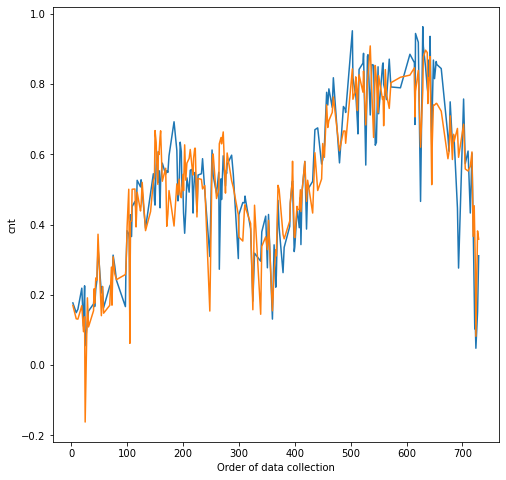

In [53]:
# Plotting actual and fitted values against order of data collection on the test set
fig,ax = plt.subplots(figsize=[8,8])
sns.lineplot(X_test_sm.index,y_test,ax=ax)
sns.lineplot(X_test_sm.index,y_test_pred,ax=ax)
ax.set_xlabel('Order of data collection')
fig.show()

Thus, the model is a good predictor of the response variable on the test dataset.

## 8 Model Interpretation

### 8.1 Equation of multiple linear regression with normalised variables

cnt = 0.25 + 0.2289\*yr - 0.1079\*holiday - 0.0185\*workingday + 0.5301\*temp - 0.1763\*hum - 0.1859\*windspeed + 0.1065\*season_2 + 0.1362\*season_4 + 0.0585\*mnth_8 + 0.1273\*mnth_9 + 0.0357\*mnth_10 - 0.0554\*weathersit_2 - 0.2407\*weathersit_3

### 8.2 Interpretation of results

In [61]:
sorted(lr.params.index,key=lambda x: abs(lr.params[x]),reverse=True)

['temp',
 'const',
 'weathersit_3',
 'yr',
 'windspeed',
 'hum',
 'season_4',
 'mnth_9',
 'holiday',
 'season_2',
 'mnth_8',
 'weathersit_2',
 'mnth_10',
 'workingday']

As per the final model, the top 3 variables that predict the demand for bikes are as follows:
1. temp - when the normalised value of temp increases by 1, the normalised value of cnt increases by 0.5301
2. weathersit_3 - when weathersit_3 (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds) takes the value 1 (compared to the reference 0), the normalised value of cnt decreases by 0.2407
3. yr - when yr takes the value 1 (compared to the reference 0), the normalised value of cnt increases by 0.2289

Additional variables that predict the demand for bikes are:
1. windspeed - when the normalised value of windspeed increases by 1, the normalised value of cnt decreases by 0.1859
2. hum - when the normalised value of hum increases by 1, the normalised value of cnt decreases by 0.1763
3. season_4 - when season_4 (winter) takes the value 1 (compared to the reference 0), the normalised value of cnt increases by 0.1362

Since demand has increased year-on-year, it can be expected to be high when COVID lockdowns are repealed. BoomBikes should prepare for high demand when the temperature is high and for low demand when the weather is Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds.

Additionally, BoomBikes can expect lower demand when windspeed and humidity are high and higher demand during winter (season 4).